In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

from dentate_circuit_model.optimize_dynamic_model import get_binary_input_patterns

import itertools
from tqdm import tqdm

In [2]:
def generate_patterns(n):
    input_patterns = []
    for pattern in itertools.product([0,1],repeat=n):
        input_patterns.append(pattern)
    return torch.tensor(input_patterns).type(torch.float32)

class dentate_network(nn.Module):
    def __init__(self, lr):
        self.lr = lr
        self.input_size = 7
        self.hidden_size = 7
        self.output_size = 128
        
        super().__init__()
        
        self.net = nn.Sequential(nn.Linear(self.input_size, self.hidden_size,bias=True),
                                nn.Linear(self.hidden_size, self.output_size,bias=True))

        self.lossCriterion = nn.MSELoss()
        self.optimizer = torch.optim.SGD(self.parameters(), lr=lr)
        
        
    def forward(self, input_pattern):
        
        output = self.net(input_pattern)
        
        return output
    
    
    def train(self,epochs,all_patterns):
        losses = []
        for i in tqdm(range(epochs)):  
            self.optimizer.zero_grad()
            
            pattern_index = np.random.randint(0,128)
            input_pattern = all_patterns[pattern_index]
            output = self.forward(input_pattern)
            target = torch.eye(128)[pattern_index]
            
            loss = self.lossCriterion(output,target)
            losses.append(loss.detach())
            loss.backward()
            self.optimizer.step()
            
        return losses

In [3]:
simple_net = dentate_network(lr=0.01)
all_patterns = torch.tensor(get_binary_input_patterns(7),dtype=torch.float32)

# w_init = {'in': simple_net.net[0].weight.detach().numpy().flatten(),
#           'h1': simple_net.net[2].weight.detach().numpy().flatten(),
#           'h2': simple_net.net[4].weight.detach().numpy().flatten(),
#           'out': simple_net.net[6].weight.detach().numpy().flatten()}

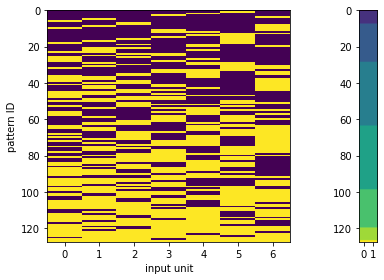

In [4]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(7,4))

ax1.imshow(all_patterns,aspect='auto',interpolation='nearest')
ax1.set_ylabel('pattern ID')
ax1.set_xlabel('input unit')

summed_input = np.sum(all_patterns.numpy(),axis=1)
summed_input = np.array([summed_input,summed_input])
ax2.imshow(summed_input.T,aspect=0.2)

fig.tight_layout()
plt.show()

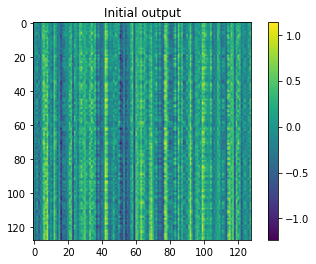

In [5]:
output = []
for pattern in all_patterns:
    output.append(list(simple_net.forward(pattern).detach()))
output = np.array(output)

plt.imshow(output)
plt.colorbar()
plt.title('Initial output')
plt.show()

In [6]:
epochs = 10**6
losses = simple_net.train(epochs, all_patterns)

100%|██████████| 1000000/1000000 [02:52<00:00, 5813.87it/s]


(0.0, 0.1936904340982437)

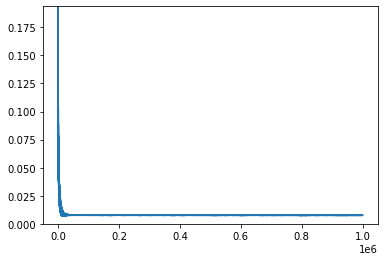

In [7]:
plt.plot(losses)
ymax = np.max([0.01,np.max(losses)])
plt.ylim([0,ymax])

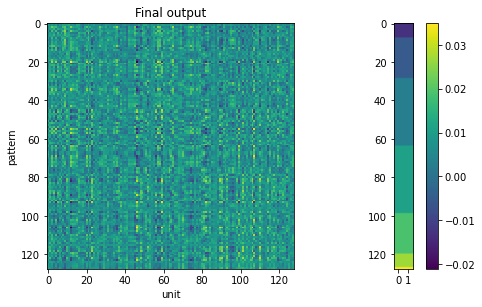

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(7,4))

output = []
for pattern in all_patterns:
    output.append(list(simple_net.forward(pattern).detach()))
output = np.array(output)

im = ax1.imshow(output,interpolation='nearest')
plt.colorbar(im)
ax1.set_xlabel('unit')
ax1.set_ylabel('pattern')
ax1.set_title('Final output')

summed_input = np.sum(all_patterns.numpy(),axis=1)
summed_input = np.array([summed_input,summed_input])
ax2.imshow(summed_input.T,aspect=0.2)


fig.tight_layout()
plt.show()

NameError: name 'w_init' is not defined

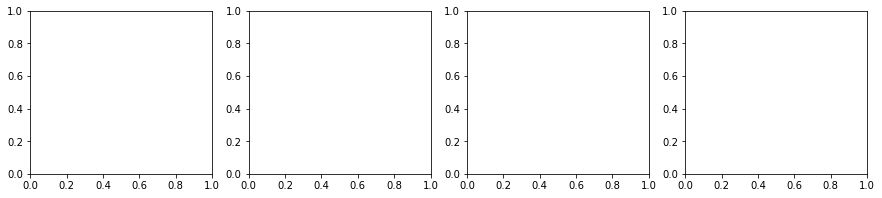

In [9]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,3))

ax1.hist(w_init['in'],50)
ax1.set_title('Input -> Hidden')

ax2.hist(w_init['h1'],20)
ax2.set_title('H1')

ax3.hist(w_init['h2'],20)
ax3.set_title('H2')

ax4.hist(w_init['out'],20)
ax4.set_title('Out')

plt.suptitle('Initial weights',fontsize=20)

fig.tight_layout()
plt.show()

In [ ]:
# w_final = {'in': simple_net.net[0].weight.detach().numpy().flatten(),
#           'h1': simple_net.net[2].weight.detach().numpy().flatten(),
#           'h2': simple_net.net[4].weight.detach().numpy().flatten(),
#           'out': simple_net.net[6].weight.detach().numpy().flatten()}

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,3))

ax1.hist(w_final['in'],50)
ax1.set_title('Input -> Hidden')

ax2.hist(w_final['h1'],20)
ax2.set_title('H1')

ax3.hist(w_final['h2'],20)
ax3.set_title('H2')

ax4.hist(w_final['out'],20)
ax4.set_title('Out')

plt.suptitle('Final weights',fontsize=20)

fig.tight_layout()
plt.show()